# **Project Title:**
Exploratory Data Analysis of Car Features
# **Context**
As a data scientist, the majority of your time will be spent on data pre-processing i.e.
making sure you have the right data in the right format. Once this is done, you get a
sense of your dataset through applying some descriptive statistics and then, you move
on to the exploration stage wherein you plot various graphs and mine the hidden
insights. In this project, you as a data scientist are expected to perform Exploratory data
analysis on how the different features of a car and its price are related. The data comes
from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car
models, sold in the USA between 1990 and 2017, with the market price (new or used)
and some features.
# **Objective**
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset.

**Link for the dataset: https://www.kaggle.com/CooperUnion/cardataset**

In [3]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.
from google.colab import files 
uploaded= files.upload()

Saving data.csv to data.csv


In [79]:
import io
data = io.BytesIO(uploaded['data.csv'])

In [80]:
#reading the csv file onto the google colab
data= pd.read_csv(data)

In [81]:
#reading the dataset
data.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [82]:
#checking the data type of each column of our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

#**Descriptive or summary statistics in python**
 **– pandas, can be obtained by using describe function – describe(). Describe Function gives the mean, std and IQR values.**
This function excludes the character columns and gives summary statistics of numeric columns.We need to add a variable named include=’all’ to get the summary statistics or descriptive statistics of both numeric and character column.


In [83]:
#The following function gives the statistical  measures of the numerical values.
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


We can now check the shape of our data set, which means checking the number of rows and columns containing all the information.

In [84]:
#The result of the following function would be in the form of (number of rows * number of columns)
data.shape

(11914, 16)

##**Working with Null Values:**
Missing Data can occur when no information is provided for one or more items or for a whole unit. Missing Data is a very big problem in real life scenario. Missing Data can also refer to as NA(Not Available) values.In order to check missing values in Pandas DataFrame, we use a function isnull() and notnull(). Both function help in checking whether a value is NaN or not. These function can also be used in Pandas Series in order to find null values in a series.

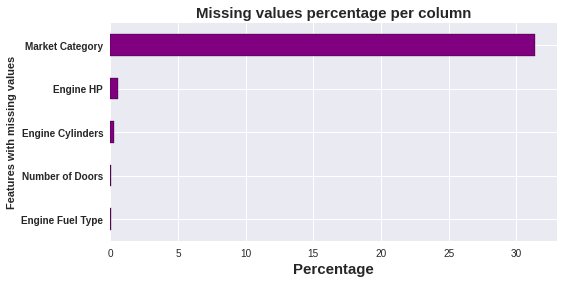

In [85]:
#The following graph gives the percentage of null values , in each column. 
plt.style.use('seaborn')
allna = (data.isnull().sum() / len(data))*100
allna = allna.drop(allna[allna == 0].index).sort_values()
plt.figure(figsize=(8, 4))
allna.plot.barh(color=('purple'), edgecolor='black')
plt.title('Missing values percentage per column', fontsize=15, weight='bold' )
plt.xlabel('Percentage', weight='bold', size=15)
plt.ylabel('Features with missing values', weight='bold')
plt.yticks(weight='bold')
plt.show()

In [86]:
#The following function gives the number of null values, in each column. 
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

After this, we can either drop the rows or columns having null values, or we can fill the missing values with the appropriate values.
We can see the columns, "Engine Fuel Type", "Engine HP", "Engine Cylinders" are having less than 1% of data missing, so we can fill those values using some techniques.
The column "Market Category" has the missing data of about 30%, which is a huge amount and can affect the accuracy of the model. So we will drop that column.

In [87]:
#Dropping column.
data.drop(columns=['Market Category'], axis=1, inplace=True)

In [88]:
#Checking the dataset after dropping a column from it.
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


Next, we can fill the missing values of our dataset(which are less than 1%, so they will not affect the accuracy of the model), by using either "forward-fill" or "backward-fill" method. In this case, I will be using forward-fill method.

In [89]:
#Filling the missing values using forward-fill technique.
data.fillna(method='ffill', inplace=True)

In [90]:
#Checking the dataset for null values once again.
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

**We successfully removed/filled the missing values from our dataset. Our dataset is now clean, and ready to work on.**

Now, our actual task is to predict the price of cars, using the columns of our dataset. We can hence remove few columns, which have not relevance with the price prediction.

In [91]:
#We can check what all unique values are there in each categorical column.
cols=['Make','Year', 'Model','Engine Fuel Type','Transmission Type', 'Driven_Wheels','Vehicle Size', 'Vehicle Style']
for i in cols:
    print(data[i].unique())

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
[2011 2012 2013 1992 1993 1994 2017 1991 2016 1990 2015 1996 1997 1998
 2014 1999 2002 2003 2004 1995 2007 2008 2009 2001 2010 2000 2005 2006]
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '50

Here, we can see few columns are of no use and hence cannot be used for further anaysis.
"Model" is a column which will we will drop as this column is not going to predict the price of the car, as too many kind of models are there. This can lead to "Over-fitting" of our model.

In [92]:
#Dropping the column.
data.drop(['Model'], axis=1, inplace=True)

In [93]:
#Checking the data
data.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [94]:
#Renaming the columns.
data.columns= ['Make', 'Year', 'Engine Fuel Type', 'HP', 'Cylinders','Transmission','Drive Mode','Number of Doors', 'Vehicle Size',
       'Vehicle Style', 'MPG-H', 'MPG-C','Popularity', 'Price']

In [95]:
#Checking the new column names.
data.head()

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In Data Science, we usually come accross some duplicate entries, in the rows. This means two rows having the exact same values for each column. This could be eliminated through the use of pandas.dataframe.duplicated() function.

In [96]:
#Finding the duplicate entries.
duplicateDFRow = data[data.duplicated()]
print(duplicateDFRow)

         Make  Year             Engine Fuel Type  ...  MPG-C  Popularity  Price
14        BMW  2013  premium unleaded (required)  ...     19        3916  31500
18       Audi  1992             regular unleaded  ...     17        3105   2000
20       Audi  1992             regular unleaded  ...     17        3105   2000
24       Audi  1993             regular unleaded  ...     17        3105   2000
25       Audi  1993             regular unleaded  ...     17        3105   2000
...       ...   ...                          ...  ...    ...         ...    ...
11481  Suzuki  1998             regular unleaded  ...     22         481   2000
11603   Volvo  2017             regular unleaded  ...     20         870  46350
11604   Volvo  2017             regular unleaded  ...     23         870  40950
11708  Suzuki  2008             regular unleaded  ...     15         481  29149
11717  Suzuki  2008             regular unleaded  ...     16         481  27499

[729 rows x 14 columns]


Here all the duplicate rows except their first occurrence are returned because the default value of keep argument was "first".If we want to select all the duplicate rows except their last occurrence, then we need to pass a keep argument as "last"
Pandas drop_duplicates() method helps in removing duplicates from the data frame.

In [97]:
#Removing duplicates from the data frame.
data.drop_duplicates(keep ='first', inplace = True)

In [98]:
#Checking the shape of the dataframe to check whether the duplicates are removed or not.
data.shape

(11185, 14)

**As of now, our data is free from missing values, duplicate values and unimportant rows. We may remove further rows upon visualization or deeper analysis of data.**

# Detecting and Removing Outliers.
An outlier is an observation that is unlike the other observations.Outliers are the values in dataset which standouts from the rest of the data. 
It is rare, or distinct, or does not fit in some way.
BOX-PLOTS give out the information on the variability or dispersion of the data.A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

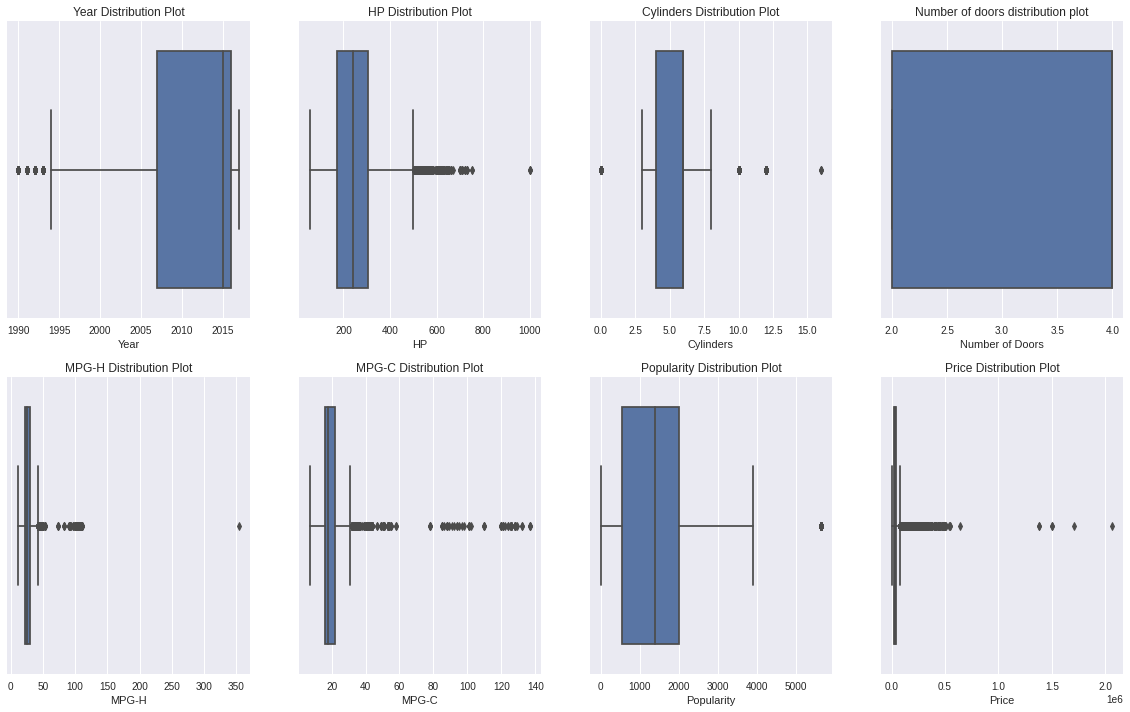

In [99]:
#Importing the seaborn library.
import seaborn as sns
#Plotting the boxplots of each continuous variable to find outliers.
plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.title("Year Distribution Plot")
sns.boxplot(x=data['Year'])

plt.subplot(2,4,2)
plt.title("HP Distribution Plot")
sns.boxplot(x=data['HP'])

plt.subplot(2,4,3)
plt.title("Cylinders Distribution Plot")
sns.boxplot(x=data['Cylinders'])

plt.subplot(2,4,4)
plt.title("Number of doors distribution plot")
sns.boxplot(x=data['Number of Doors'])

plt.subplot(2,4,5)
plt.title("MPG-H Distribution Plot")
sns.boxplot(x=data['MPG-H'])

plt.subplot(2,4,6)
plt.title("MPG-C Distribution Plot")
sns.boxplot(x=data['MPG-C'])

plt.subplot(2,4,7)
plt.title("Popularity Distribution Plot")
sns.boxplot(x=data['Popularity'])

plt.subplot(2,4,8)
plt.title("Price Distribution Plot")
sns.boxplot(x=data['Price'])

plt.show()

Now we will remove the outliers, as shown in the lines of code below. 

**Using the BOX-PLOT above, we can remove the outliers from our dataset, in moderation.**

In [100]:
#Removing outliers from Year column.
index = data[(data['Year'] <1994.0)].index
data.drop(index, inplace=True)
data['Year'].describe()

count    10725.000000
mean      2011.541352
std          6.177160
min       1994.000000
25%       2008.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: Year, dtype: float64

In [101]:
#Checking the shape
data.shape

(10725, 14)

In [102]:
#Removing the outliers of the HP column.
index = data[(data['HP'] > 490.0)].index
data.drop(index, inplace=True)
data['HP'].describe()

count    10221.000000
mean       242.239116
std         85.327615
min         55.000000
25%        174.000000
50%        236.000000
75%        300.000000
max        490.000000
Name: HP, dtype: float64

In [103]:
#Checking the shape again.
data.shape

(10221, 14)

In [104]:
#Removing the outliers of the Cylinders column.
index = data[(data['Cylinders'] > 9.0)|(data['Cylinders'] <2.0)].index
data.drop(index, inplace=True)
data['Cylinders'].describe()

count    10115.000000
mean         5.490559
std          1.438882
min          3.000000
25%          4.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: Cylinders, dtype: float64

In [105]:
#Checking the shape again, to analyze how much data is removed.
data.shape

(10115, 14)

We will also not be using this this process on "Number of Doors" column, as there are no outliers there.

In [106]:
#Removing outliers from the MPG-H column.
index = data[(data['MPG-H'] > 40.0)].index
data.drop(index, inplace=True)
data['MPG-H'].describe()

count    9884.000000
mean       26.206293
std         5.692217
min        13.000000
25%        22.000000
50%        26.000000
75%        30.000000
max        40.000000
Name: MPG-H, dtype: float64

In [107]:
#Checking the shape.
data.shape

(9884, 14)

In [108]:
#Removing the outliers of the MPG-C column.
index = data[(data['MPG-C'] > 30.0)].index
data.drop(index, inplace=True)
data['MPG-C'].describe()

count    9695.000000
mean       18.865601
std         4.194565
min         9.000000
25%        16.000000
50%        18.000000
75%        22.000000
max        30.000000
Name: MPG-C, dtype: float64

In [109]:
#Checking the shape.
data.shape

(9695, 14)

In [110]:
#Removing the outliers from the Popularity column.
index = data[(data['Popularity'] >= 3800.0)].index
data.drop(index, inplace=True)
data['Popularity'].describe()

count    8648.000000
mean     1138.008326
std       763.966201
min         2.000000
25%       481.000000
50%       873.000000
75%      1851.000000
max      3105.000000
Name: Popularity, dtype: float64

In [111]:
#Checking the final shape of our dataset.
data.shape

(8648, 14)

 Now plotting the same boxplots once again, to ensure that the outlier detection and removal tasks were done properly.

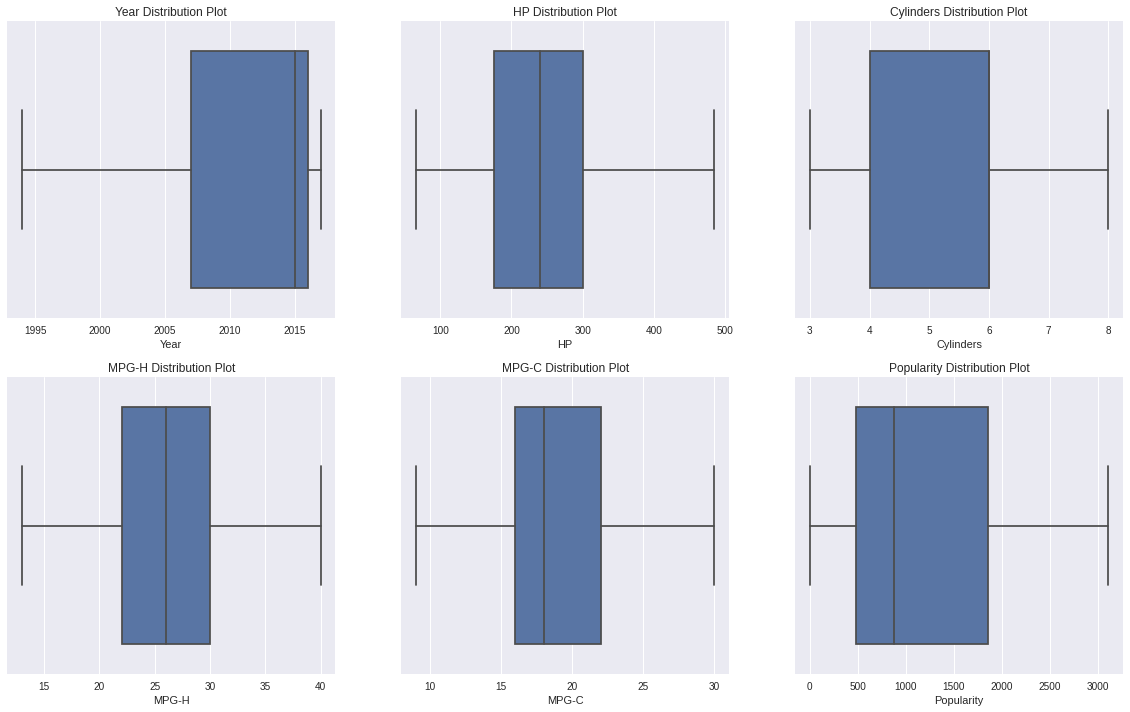

In [112]:
#Plotting the boxplots of each continuous variable to find if any outlier is left.
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title("Year Distribution Plot")
sns.boxplot(x=data['Year'])

plt.subplot(2,3,2)
plt.title("HP Distribution Plot")
sns.boxplot(x=data['HP'])

plt.subplot(2,3,3)
plt.title("Cylinders Distribution Plot")
sns.boxplot(x=data['Cylinders'])

plt.subplot(2,3,4)
plt.title("MPG-H Distribution Plot")
sns.boxplot(x=data['MPG-H'])

plt.subplot(2,3,5)
plt.title("MPG-C Distribution Plot")
sns.boxplot(x=data['MPG-C'])

plt.subplot(2,3,6)
plt.title("Popularity Distribution Plot")
sns.boxplot(x=data['Popularity'])

plt.show()

Hence, we have got rid of the outliers from our data, which could have had a bad affect on the accuracy of the model, due to "Over-fitting".
Reason why "Price", was not tested for outliers: This is because this is our Prediction Variable, which has many values in a large range. We saw in the first box plot that the outliers were also evenly distributed, and were large in numbers. Hence, removing them was not an option, and we could have lost a lot of important data.

Histogram is one of the best solution which lets us know the distribution of a variable.

[]

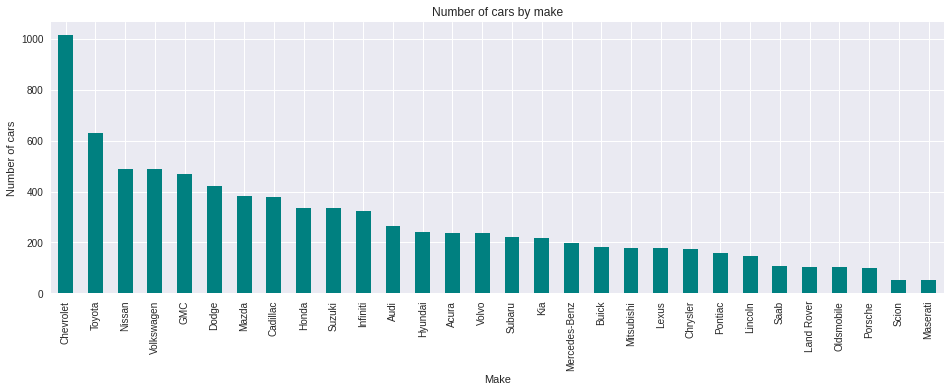

In [120]:
#Histogram to find the total number of cars sold, for each brand.
data.Make.value_counts().nlargest(30).plot(kind='bar', figsize=(16,5), color='teal')
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');
plt.plot()

**The  car brands that are the most represented in the dataset.**




In [59]:
#Returning the counts of each Car brand according to their respective number of occurences.
brands=data['Make'].value_counts()
brands

Chevrolet        1016
Toyota            630
Nissan            489
Volkswagen        487
GMC               469
Dodge             423
Mazda             383
Cadillac          380
Honda             337
Suzuki            336
Infiniti          323
Audi              264
Hyundai           242
Acura             236
Volvo             236
Subaru            220
Kia               216
Mercedes-Benz     199
Buick             184
Mitsubishi        179
Lexus             178
Chrysler          173
Pontiac           157
Lincoln           148
Saab              109
Land Rover        104
Oldsmobile        102
Porsche           101
Scion              54
Maserati           52
FIAT               46
Plymouth           43
Aston Martin       32
Ferrari            29
Lotus              28
HUMMER             17
Bentley            15
Alfa Romeo          5
Genesis             3
Spyker              2
Rolls-Royce         1
Name: Make, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


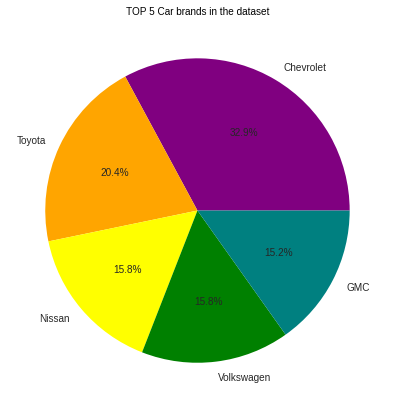

In [121]:
carr=data['Make'].value_counts().head(5).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['purple','orange','yellow','green','teal']
labels= ['Chevrolet','Toyota','Nissan','Volkswagen', 'GMC']
sizes= ['1016','630','489','487','469']
explode=[0.1,0.1,0.1,0.1,0.1]
values=data['Make'].value_counts().head(5).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('TOP 5 Car brands in the dataset',color='black',fontsize=10)
plt.show()

Hence, we can conclude that "Chevrolet" brand is mostly represented in the dataset, followed by "Toyota", "Nissan", "Volkswagen", "GMC","Dodge" and so on and so forth.


In [122]:
#Printing the top ten mostly occuring brand names.
print(brands[:10])

Chevrolet     1016
Toyota         630
Nissan         489
Volkswagen     487
GMC            469
Dodge          423
Mazda          383
Cadillac       380
Honda          337
Suzuki         336
Name: Make, dtype: int64


**Finding the average price among the top car brands. I would choose to find average price from among the top-10 car brands.**

In [123]:
#Making a dataframe using only top ten brands from "brands".
top_ten = data.loc[(data['Make'] == 'Chevrolet') | (data['Make'] == 'Toyota')| (data['Make'] == 'Nissan') | 
                   (data['Make'] == 'Volkswagen')| (data['Make'] == 'GMC')| (data['Make'] == 'Dodge')|
                   (data['Make'] == 'Mazda')| (data['Make'] == 'Cadillac')| 
                   (data['Make'] == 'Honda')| (data['Make'] == 'Suzuki')]

In [124]:
#Printing the dataframe containing only top ten brands.
top_ten.head()

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
87,Nissan,1996,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,36,26,2009,2000
89,Nissan,1996,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,29,21,2009,2000
90,Nissan,1997,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,29,21,2009,2000
91,Nissan,1997,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,35,25,2009,2000
93,Nissan,1998,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,35,25,2009,2000


In [125]:
#Printing the average/mean price of Price of top 10 brands.
top_ten['Price'].mean()

29822.649696969696

# Correlation Matrix
Variables within a dataset can be related for lots of reasons.

For example:

One variable could cause or depend on the values of another variable.
One variable could be lightly associated with another variable.
Two variables could depend on a third unknown variable.
It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction.
Neutral Correlation: No relationship in the change of the variables.
Negative Correlation: variables change in opposite directions.

In [126]:
#Creating a correlation matrix.
corr_matrix=data.corr()
#Printing the matrix.
corr_matrix

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.338946,-0.064218,0.242255,0.337827,0.299159,0.180887,0.368039
HP,0.338946,1.000000,0.758746,-0.027288,-0.475009,-0.575913,0.077481,0.698070
Cylinders,-0.064218,0.758746,1.000000,-0.024355,-0.709425,-0.768765,0.038824,0.427852
Number of Doors,0.242255,-0.027288,-0.024355,1.000000,0.050028,0.072631,-0.039936,-0.068815
MPG-H,0.337827,-0.475009,-0.709425,0.050028,1.000000,0.935321,0.032731,-0.222634
MPG-C,0.299159,-0.575913,-0.768765,0.072631,0.935321,1.000000,0.045495,-0.287988
Popularity,0.180887,0.077481,0.038824,-0.039936,0.032731,0.045495,1.000000,0.036312
Price,0.368039,0.698070,0.427852,-0.068815,-0.222634,-0.287988,0.036312,1.000000


We can use the seaborn and matplotlib packages in order to get a visual representation of the correlation matrix.

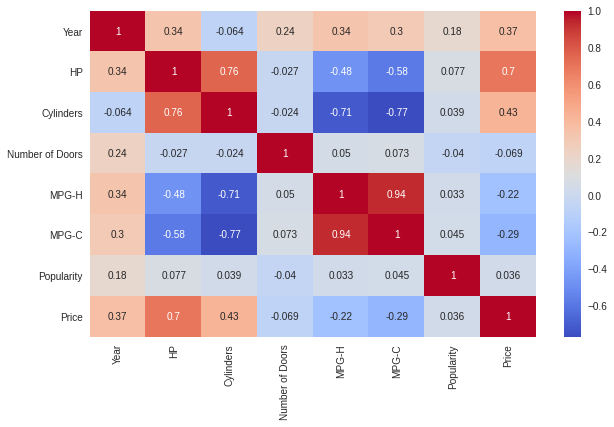

In [127]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**We can derive the following insights from the correlation matrix which is illustrated below:**


*   HP is highly correlated with Cylinders and Price, and negatively correlated with MPG-H and MPG-C.(This means that Horse Power is the one of the major contributing factors of the price of the car,)
*   Cylinders is in a moderate to high correlation with Price and negatively correlated with MPG-H and MPG-C.(This means the lesser number of cylinders, higher is the MPG-C and MPG-H.)
*   MPG-H and MPG-C are highly correlated among themselves.
 





**Plotting each continuous variable/column of the dataset with then Price column to see what is the correlation between them.**
We will do this task of visualization with the help of Scatter Plot. Scatter plot is a graph in which the values of two variables are plotted along two axes. It is a most basic type of plot that helps you visualize the relationship between two variables.

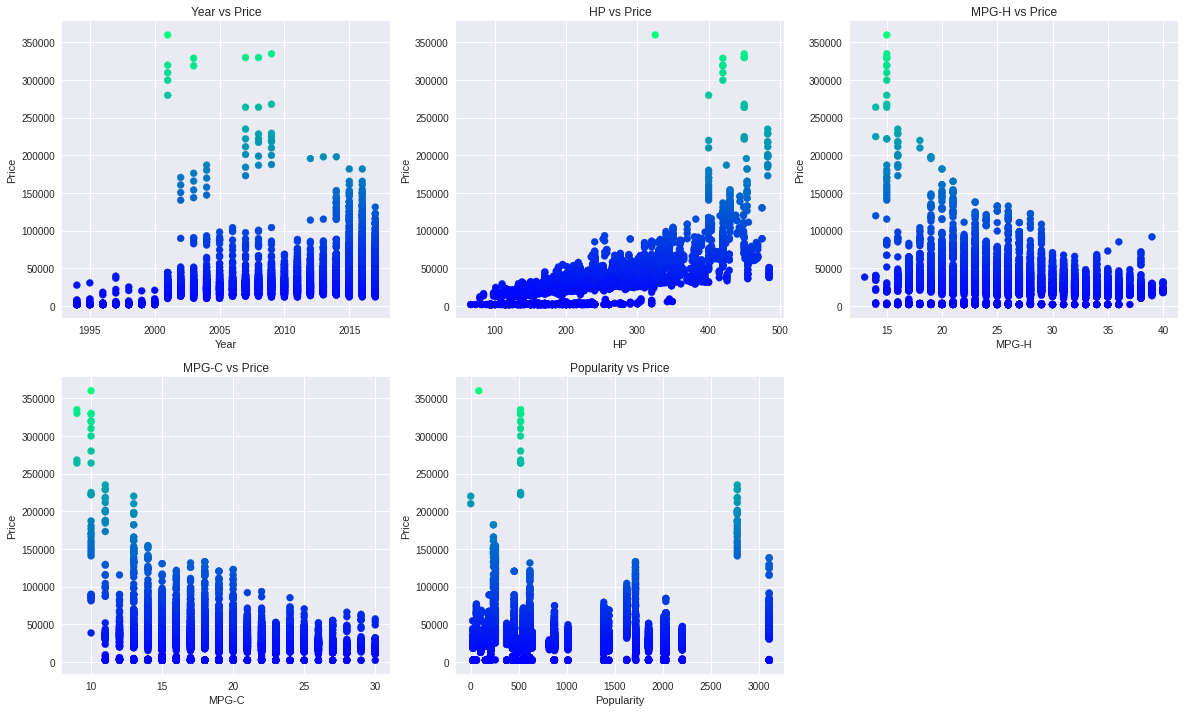

In [128]:
#Plotting the boxplots of each continuous variable to find if any outlier is left.
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title("Year vs Price")
plt.scatter(data["Year"], data["Price"],c=data['Price'], cmap='winter')
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(2,3,2)
plt.title("HP vs Price")
plt.scatter(data["HP"], data["Price"],c=data['Price'], cmap='winter')
plt.xlabel("HP")
plt.ylabel("Price")

plt.subplot(2,3,3)
plt.title("MPG-H vs Price")
plt.scatter(data["MPG-H"], data["Price"],c=data['Price'], cmap='winter')
plt.xlabel("MPG-H")
plt.ylabel("Price")

plt.subplot(2,3,4)
plt.title("MPG-C vs Price")
plt.scatter(data["MPG-C"], data["Price"],c=data['Price'], cmap='winter')
plt.xlabel("MPG-C")
plt.ylabel("Price")

plt.subplot(2,3,5)
plt.title("Popularity vs Price")
plt.scatter(data["Popularity"], data["Price"],c=data['Price'], cmap='winter')
plt.xlabel("Popularity")
plt.ylabel("Price")

plt.show()

These subplots show that HP is the most correlated feature with price. 

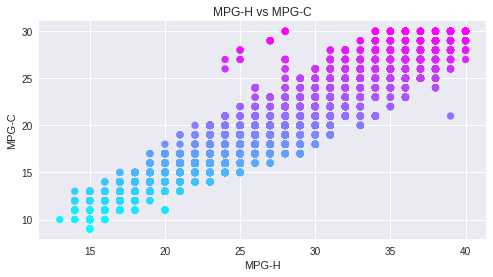

In [129]:
#plotting the scatter plot between MPG-H and MPG-C
plt.figure(figsize=(8,4))
plt.title("MPG-H vs MPG-C")
plt.scatter(data["MPG-H"], data['MPG-C'],c=data['MPG-C'], cmap='cool')
plt.xlabel("MPG-H")
plt.ylabel("MPG-C")
plt.show()

This graph shows how MPG-H and MPG-C are strongly correlated, as we already observed its high correlation value in the correlation matrix.

Let's analyize the relation between Engine Cylinders, Engine HP, Price.

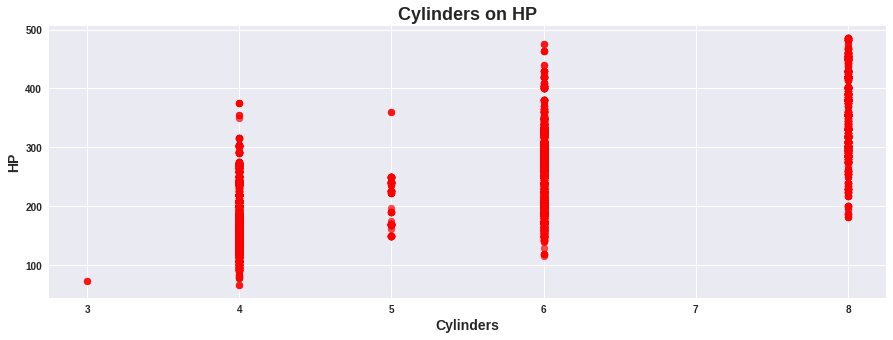

In [133]:
#Correlation between Cylinders and HP.
plt.figure(figsize=(15,5))
plt.scatter(x=data['Cylinders'], y=data['HP'], color='red', alpha=0.7)
plt.title('Cylinders on HP', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

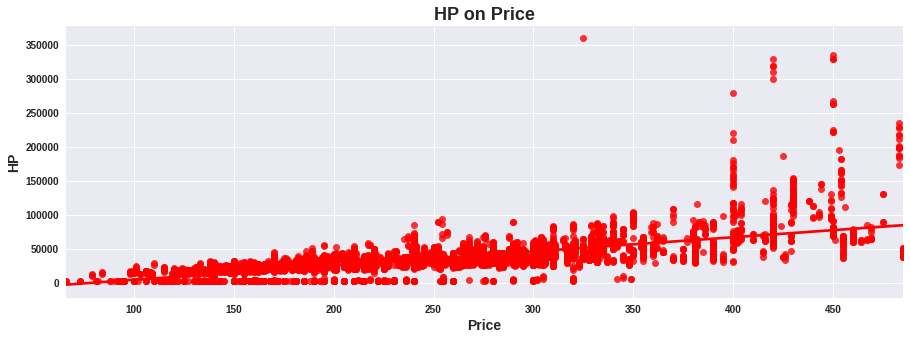

In [132]:
#Correlation between HP and Price of car.
plt.figure(figsize=(15,5))
sns.regplot(x=data['HP'], y=data['Price'], color='red')
plt.title('HP on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

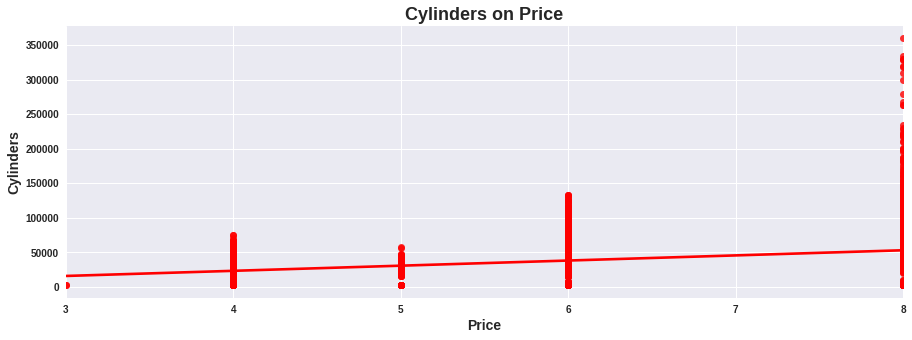

In [72]:
#Correlation between Cylinders and Price of car.
plt.figure(figsize=(15,5))
sns.regplot(x=data['Cylinders'], y=data['Price'], color='red')
plt.title('Cylinders on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('Cylinders', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

Inference : An engine with more cylinders produces more power, and more power means a high MSRP

**Correlation between MPG, Engine HP, Price** 

[]

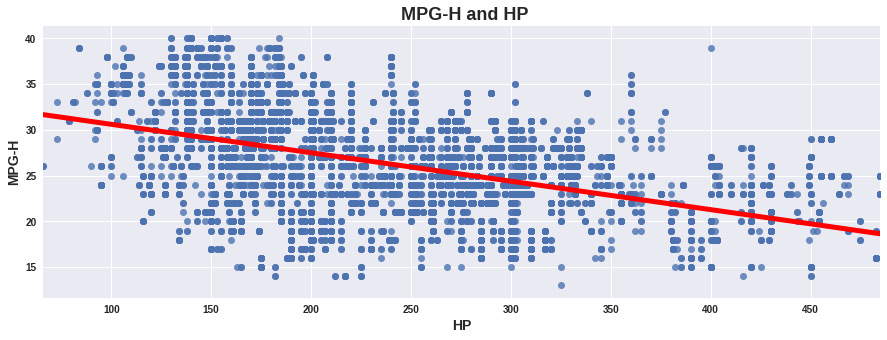

In [73]:
#Correlation between MPG-H and HP.
plt.figure(figsize=(15,5))
sns.regplot(x=data["HP"], y=data["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title(' MPG-H and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.plot()

[]

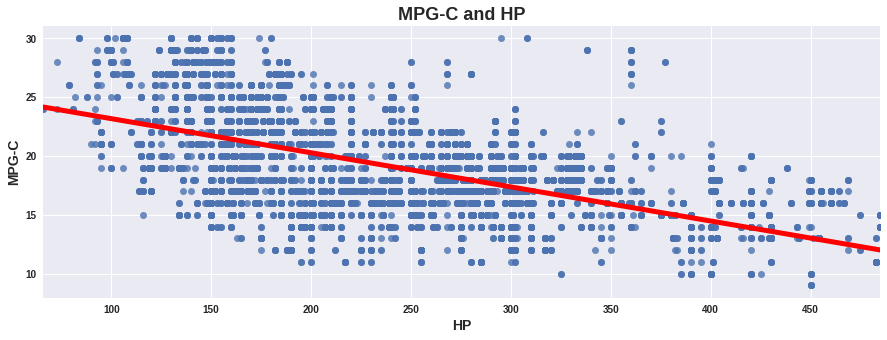

In [134]:
#Correlation between HP and MPG-C.
plt.figure(figsize=(15,5))
sns.regplot(x=data["HP"], y=data["MPG-C"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-C and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-C', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.plot()

[]

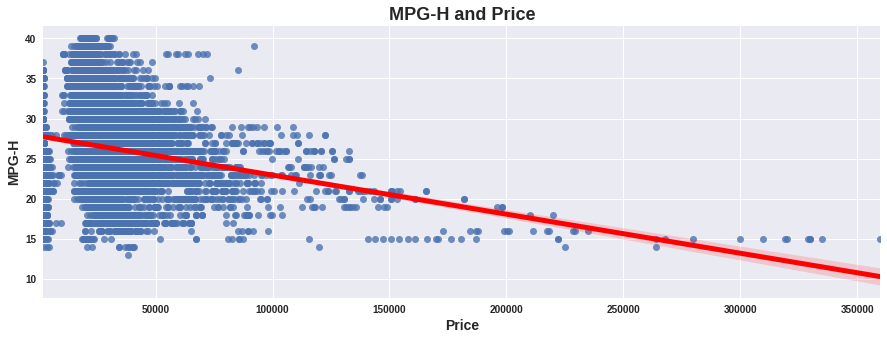

In [135]:
#Correlation between Price of car and MPG-H.
plt.figure(figsize=(15,5))
sns.regplot(x=data["Price"], y=data["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.plot()

[]

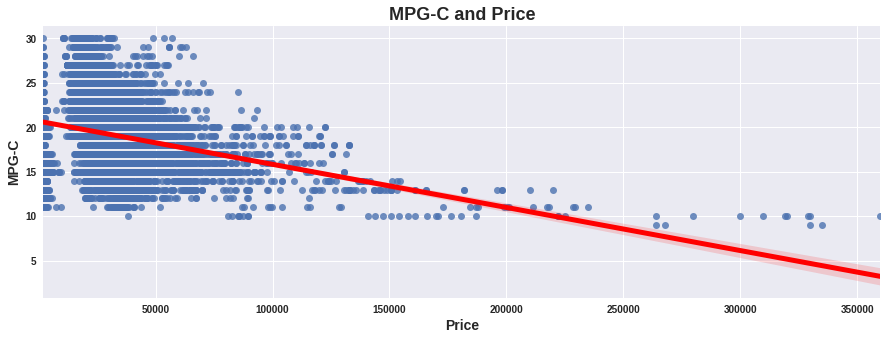

In [136]:
#Correlation between Price of car and MPG-C.
plt.figure(figsize=(15,5))
sns.regplot(x=data["Price"], y=data["MPG-C"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-C and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('MPG-C', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.plot()

#**One Hot Encoding:**
One Hot Encoding –
It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.A one hot encoding is a representation of categorical variables as binary vectors


In [137]:
#importing LabelEncoder library for the above stated process.
from sklearn.preprocessing import LabelEncoder
#making an object of labelencoder class.
le= LabelEncoder()
#Putting all the string columns into one list.
string_cols= data[["Make", "Engine Fuel Type", "Transmission", "Drive Mode", "Vehicle Size", "Vehicle Style"]]

In [139]:
#Converting string column values to string, to be safe from error.
string_cols= string_cols.astype('str')

In [140]:
#Looking at the string columns dataframe
string_cols

,Make,Engine Fuel Type,Transmission,Drive Mode,Vehicle Size,Vehicle Style
27,Audi,regular unleaded,AUTOMATIC,front wheel drive,Midsize,Wagon
28,Audi,regular unleaded,MANUAL,all wheel drive,Midsize,Sedan
29,Audi,regular unleaded,MANUAL,front wheel drive,Midsize,Sedan
30,Audi,regular unleaded,AUTOMATIC,front wheel drive,Midsize,Sedan
31,Audi,regular unleaded,AUTOMATIC,all wheel drive,Midsize,Wagon
...,...,...,...,...,...,...
11909,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11910,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11911,Acura,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11912,Acura,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


In [141]:
#Fitting the string columns into label encoder.
string_cols=string_cols.apply(le.fit_transform)

In [142]:
#Having a look at the transformed dataframe.
string_cols.head()

,Make,Engine Fuel Type,Transmission,Drive Mode,Vehicle Size,Vehicle Style
27,3,8,1,2,2,15
28,3,8,2,0,2,14
29,3,8,2,2,2,14
30,3,8,1,2,2,14
31,3,8,1,0,2,15


In [143]:
#Replacing the same numericial columns by their encoded labels.
data[["Make", "Engine Fuel Type", "Transmission", "Drive Mode", "Vehicle Size", "Vehicle Style"]]= string_cols[["Make", "Engine Fuel Type", "Transmission", "Drive Mode", "Vehicle Size", "Vehicle Style"]]

In [144]:
#Having a look at the entire dataset, after transformation.
data.head(15)

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
27,3,1994,8,172.0,6.0,1,2,4.0,2,15,21,16,3105,2000
28,3,1994,8,172.0,6.0,2,0,4.0,2,14,22,16,3105,2000
29,3,1994,8,172.0,6.0,2,2,4.0,2,14,22,17,3105,2000
30,3,1994,8,172.0,6.0,1,2,4.0,2,14,22,16,3105,2000
31,3,1994,8,172.0,6.0,1,0,4.0,2,15,21,16,3105,2000
32,10,2017,6,160.0,4.0,2,3,2.0,0,6,35,26,819,27495
33,10,2017,6,160.0,4.0,2,3,2.0,0,6,35,26,819,24995
34,10,2017,6,160.0,4.0,2,3,2.0,0,6,35,26,819,28195
64,8,2015,3,184.0,4.0,1,2,4.0,2,14,36,23,1013,25170
65,8,2015,3,184.0,4.0,1,2,4.0,2,14,36,23,1013,23950


In [145]:
#Splitting the predictor and prediction variables.
X= data['HP'].values
Y= data["Price"].values

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
m=len(XT)
#Cannot use Rank 1 matrix in scikit learn
XT=XT.reshape((m,1))
#Creating model
reg=LinearRegression()
#Fitting training data
reg=reg.fit(XT,YT)
#Y Prediction
Y_pred=reg.predict(xt)

#Calculating R2 score

r2_score= reg.score(xt,yt)
print(r2_score)

0.5045866700859656


In [56]:
from sklearn.model_selection import train_test_split
XT, xt, YT, yt = train_test_split(X, Y, test_size = 0.25, random_state = 4)


In [591]:
from sklearn.tree import DecisionTreeClassifier

In [592]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(XT,YT)

#Predict the response for test dataset
y_pred = clf.predict(xt)

In [593]:
print("Accuracy:",metrics.accuracy_score(yt, y_pred))

Accuracy: 0.05689176688251619


In [594]:
clf.score(xt,yt)

0.05689176688251619

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yt, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yt, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yt, Y_pred)))

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(XT,YT)

y_pred=clf.predict(xt)

In [ ]:
df = pd.DataFrame({'Actual': yt, 'Predicted': y_pred})
df.head(20)

In [536]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matrix in scikit learn

reg=LinearRegression()
#Fitting training data
reg=reg.fit(XT,YT)
#Y Prediction
Y_pred=reg.predict(xt)

In [66]:
clf.score(xt,yt)

0.05689176688251619

In [61]:
df = pd.DataFrame({'Actual': yt, 'Predicted': Y_pred})
df.head(20)

,Actual,Predicted
0,16495,12671.566852
1,23370,23356.333177
2,2000,4204.393538
3,75010,79602.555907
4,13330,6825.185278
5,126100,71740.180687
6,43340,52588.241048
7,36000,43516.269639
8,40250,35452.295055
9,25690,23356.333177


In [62]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(yt, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yt, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yt, Y_pred)))

Mean Absolute Error: 10391.064167319873
Mean Squared Error: 360130831.8763131
Root Mean Squared Error: 18977.11337048691


In [508]:
xt.shape

(2162, 3)

In [494]:
len(Y_pred)

2162